В этом блоке мы познакомимся с тем, как строить и интерпретировать ACF и  PACF

В примерах 1-6 мы посмотрим, как выглядят коррелограммы для искусственно сгенерированных AR, MA и ARMA рядов

В примере 7 поглядим на коррелограммы реальных данных

In [15]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import statsmodels.api as sm
import matplotlib.pyplot as plt


Populating the interactive namespace from numpy and matplotlib


Создадим функции, которые будут генерировать процессы AR(1), MA(1), AR(2), AR(3), ARMA(2,2) со стандартным нормальным белым шумом

In [16]:
# ar геренирует ряд AR(1) без константы с коэффициентом phi

def ar(num,phi):
    eps = np.random.normal(0, 1, size=num)
    walk = np.zeros(num)
    walk[0] = eps[0]
    for i in range (1,num):
        walk[i] = phi*walk[i-1] + eps[i]
    return walk

# ma геренирует ряд MA(1) без константы с коэффициентом theta

def ma(num,theta):
    eps = np.random.normal(0, 1, size=num)
    walk = np.zeros(num)
    walk[0] = eps[0]
    for i in range (1,num):
        walk[i] = theta*eps[i-1] + eps[i]
    return walk

# ar2 геренирует ряд AR(2) без константы с коэффициентами phi1, phi2

def ar2(num,phi1,phi2):
    eps = np.random.normal(0, 1, size=num)
    walk = np.zeros(num)
    walk[0] = eps[0]
    for i in range (1,num):
        walk[i] = phi1*walk[i-1] + phi2*walk[i-2] + eps[i]
    return walk

# ar3 геренирует ряд AR(3) без константы с коэффициентами phi1, phi2, phi3

def ar3(num,phi1,phi2,phi3 ):
    eps = np.random.normal(0, 1, size=num)
    walk = np.zeros(num)
    walk[0] = eps[0]
    for i in range (1,num):
        walk[i] = phi1*walk[i-1] + phi2*walk[i-2] + phi3*walk[3] + eps[i]
    return walk

# arma22 геренирует ряд ARMA(22) без константы с коэффициентами phi1, phi2, theta1, theta2

def arma22(num,phi1,phi2,theta1,theta2 ):
    eps = np.random.normal(0, 1, size=num)
    walk = np.zeros(num)
    walk[0] = eps[0]
    for i in range (1,num):
        walk[i] = phi1*walk[i-1] + phi2*walk[i-2] + eps[i] + theta1*eps[i-1] + theta2*eps[i-2]
    return walk

Сгенерируем процесс MA(1) и нарисуем его график

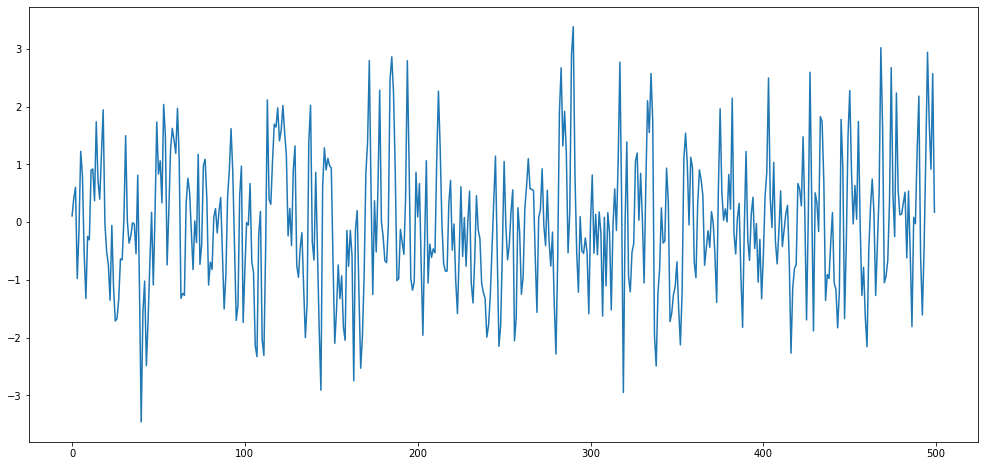

In [17]:
ma1 = ma(500, 0.7)
plt.figure(figsize(17,8))
plt.plot(ma1)

Пример 1
Построим acf и pacf для сгенерированного процесса. 

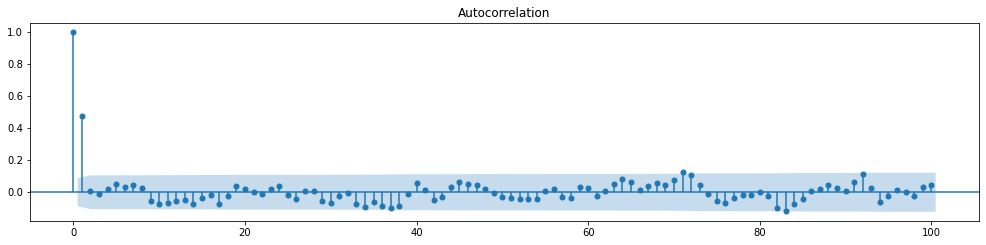

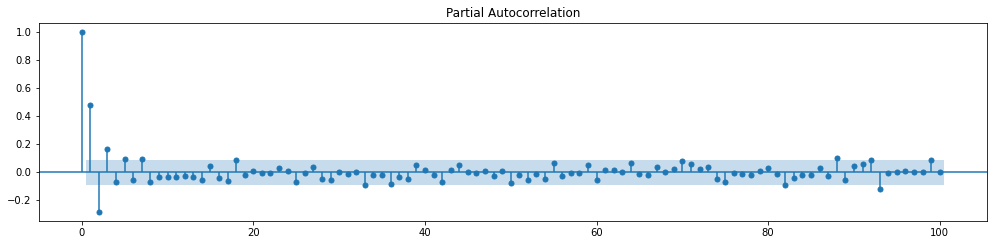

In [18]:
plt.figure(figsize(17,8))
ax = plt.subplot(211)
# tsa.plot_acf рисует коррелограмму acf. lags=100 задает число лагов, для которых строится acf
sm.graphics.tsa.plot_acf(ma1.squeeze(), lags=100, ax=ax)
plt.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(ma1.squeeze(), lags=100, ax=ax)
plt.show()

Основная информация о MA модели содержится в ее acf коррелограмме. На ней явно видно, что первый лаг существенно отличается от нуля, а последующие лежат в рамках синей области, то есть их можно с большой уверенностью считать нулями

Пример 2
Сгенерируем процесс белого шума и нарисуем его график

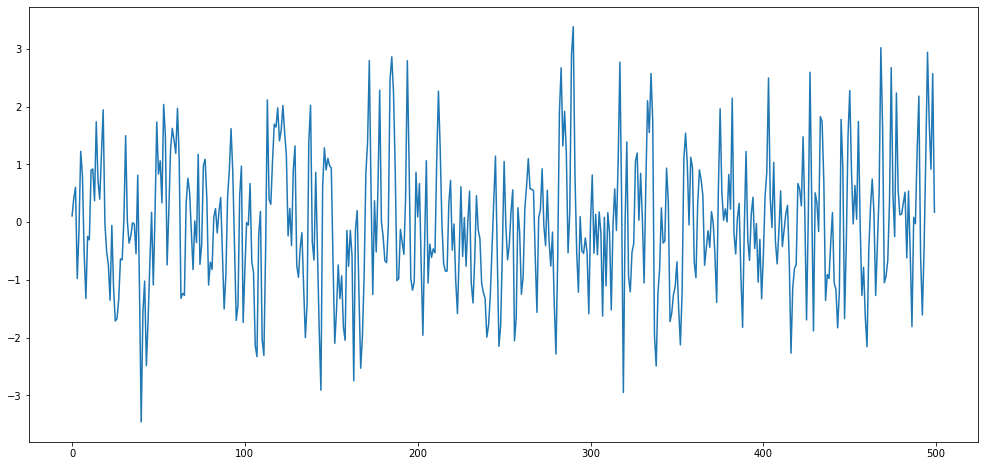

In [19]:
eps = np.random.normal(0, 1, size=500)
plt.plot(ma1)

Визуально процесс белого шума не сильно отличается от MA(1)

Однако на коррелограммах разница заметна:

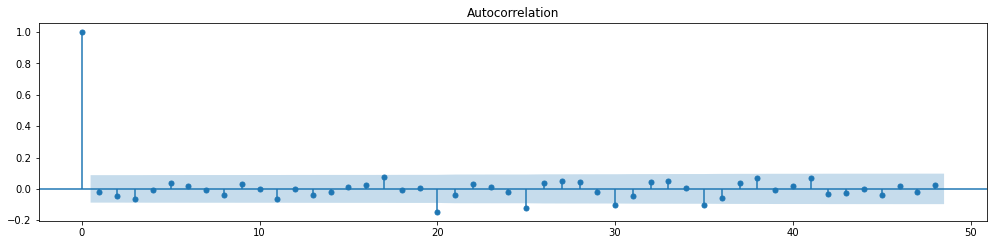

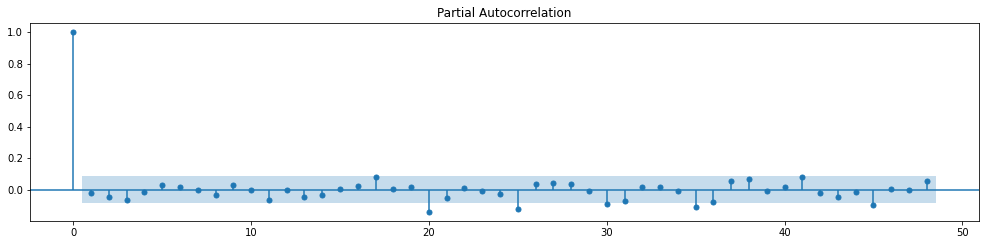

In [20]:
plt.figure(figsize(17,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(eps.squeeze(), lags=48, ax=ax)
plt.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(eps.squeeze(), lags=48, ax=ax)
plt.show()

Как видите, у белого шума нет сущесвенно отличных от нуля лагов на обеих коррелограммах. Это вполне понятно, тк процесс белого шума является совершенно хаотичным

Пример 3

Сгенерируем процесс авторегрессии AR(1) и нарисуем его график

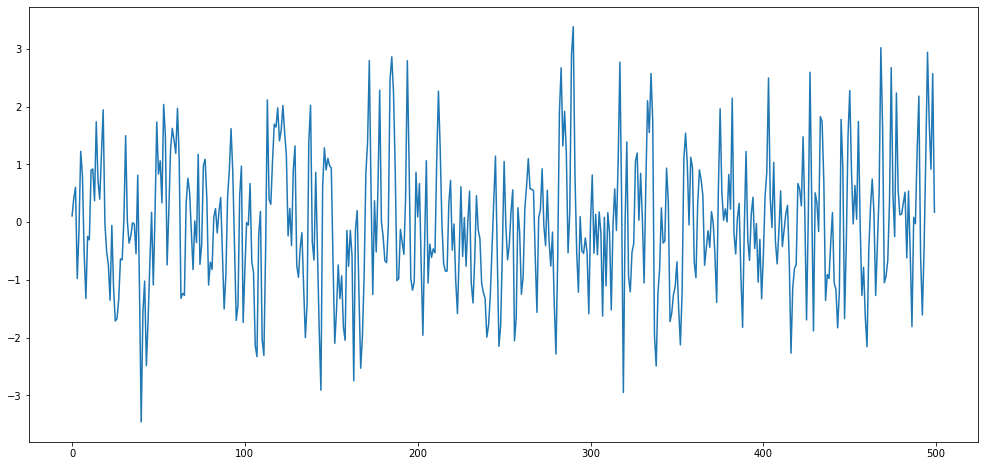

In [21]:
ar1= ar(500, 0.8)
plt.figure(figsize(17,8))
plt.plot(ma1)

Снова сложно отличить это случайное блуждание от белого шума. Давайте посмотрим на коррелограммы

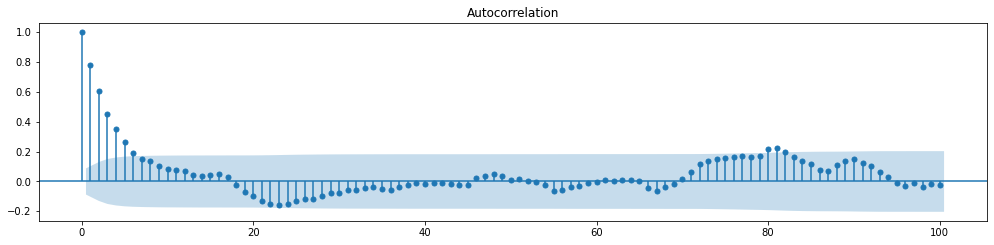

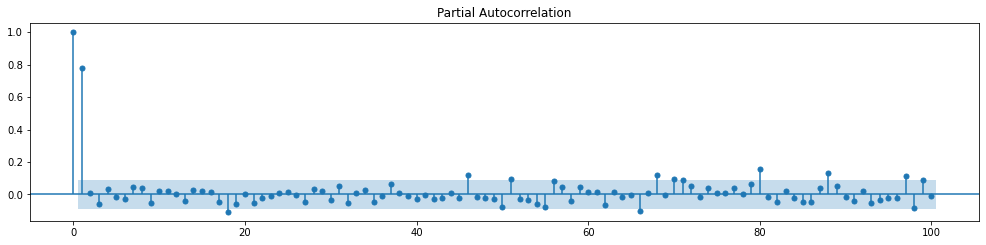

p-value теста Дики-Фуллера: 1.0893686748447052e-11


In [22]:
plt.figure(figsize(17,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(ar1.squeeze(), lags=100, ax=ax)
plt.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(ar1.squeeze(), lags=100, ax=ax)
plt.show()
print("p-value теста Дики-Фуллера:",  sm.tsa.stattools.adfuller(ar1)[1])

Коррелограмма ACF типична для процессов типа AR(1). Видим на ней в начале убывание лагов по геометрической прогресии, как и предсказывает нам теория

На частичной коррелограмме PACF мы видим один лаг (первый), сильно отличающийся от нуля.

Пример 4

Сгенерируем процесс авторегрессии AR(2) и AR(3) и нарисуем их коррелограммы

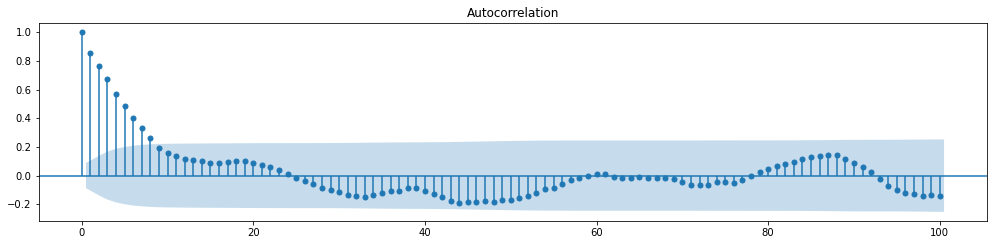

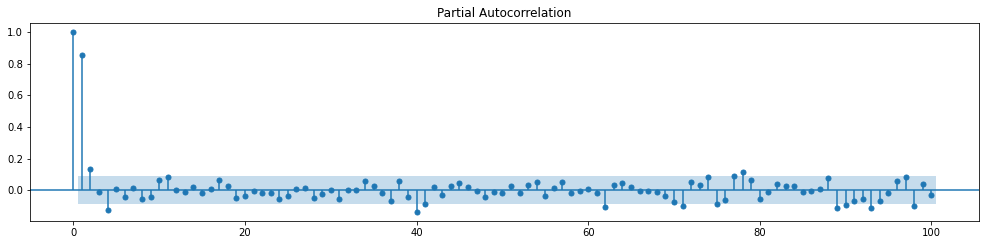

p-value теста Дики-Фуллера: 8.749453918140806e-07


In [23]:
ar2_ = ar2(500, 0.7,0.2)
plt.figure(figsize(17,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(ar2_.squeeze(), lags=100, ax=ax)
plt.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(ar2_.squeeze(), lags=100, ax=ax)
plt.show()
print("p-value теста Дики-Фуллера:",  sm.tsa.stattools.adfuller(ar2_)[1])

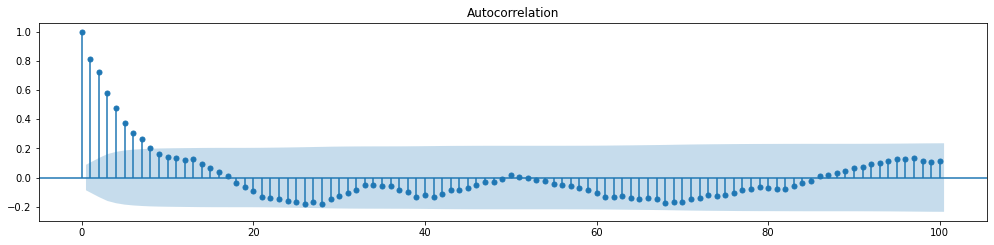

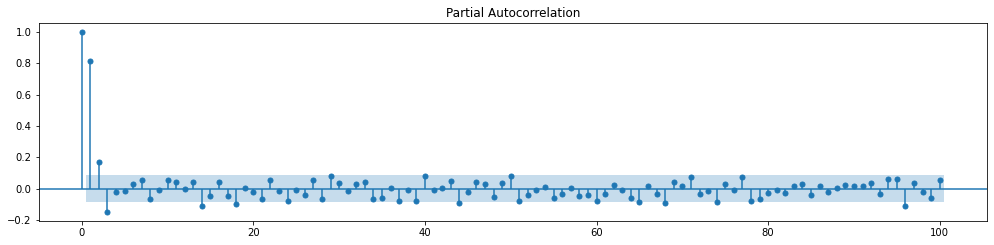

p-value теста Дики-Фуллера: 3.5033764424845924e-08


In [24]:
ar3_ = ar3(500,0.7,0.2,-0.1)
plt.figure(figsize(17,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(ar3_.squeeze(), lags=100, ax=ax)
plt.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(ar3_.squeeze(), lags=100, ax=ax)
plt.show()
print("p-value теста Дики-Фуллера:",  sm.tsa.stattools.adfuller(ar3_ )[1])

Снова типичная картинка ACF для AR(p) процессов - экспоненциальное (т.е. по геометрической прогрессии) убывание лагов

Пример 5

Давайте посмотрим, как выглядят коррелограммы нестационарных рядов.

Сгенерируем случайное блуждание с коэффициентом 1

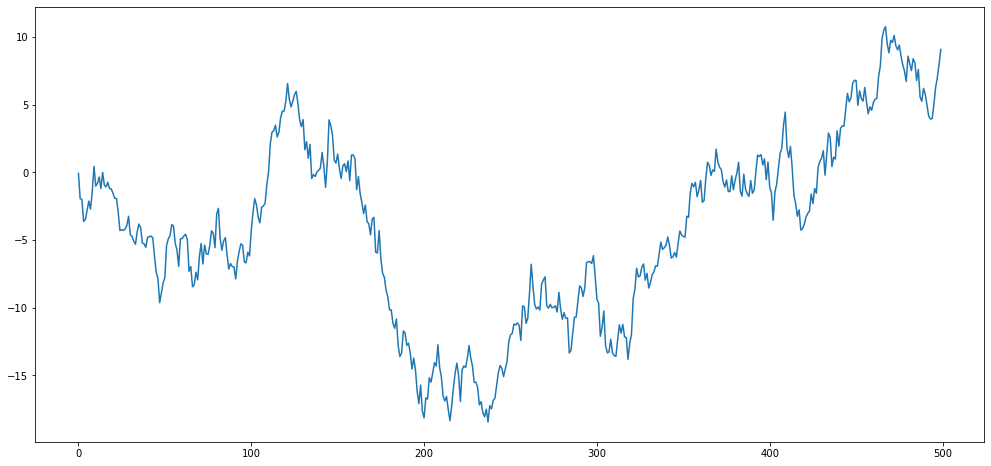

In [25]:
ar_n = ar(500,1)
plt.plot(ar_n)

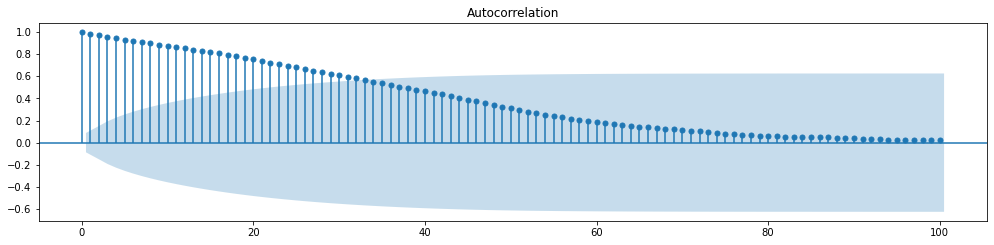

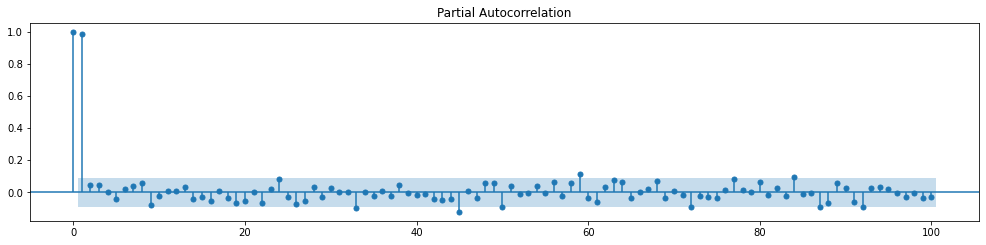

p-value теста Дики-Фуллера: 0.6903179934635082


In [26]:
plt.figure(figsize(17,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(ar_n.squeeze(), lags=100, ax=ax)
plt.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(ar_n.squeeze(), lags=100, ax=ax)
plt.show()
print("p-value теста Дики-Фуллера:",  sm.tsa.stattools.adfuller(ar_n )[1])

Ряд имеет ярко выраженный (хоть и случайный) тренд. Это сказывается на его ACF коррелограмме - автокорреляции завышены

На частичной коррелограмме (PACF) видим один отличный от нуля лаг - первый

Пример 6

Сгенерируем ряд  ARMA(2,2) и посмотрим на его коррелограммы. Для комбинированных моделей ARMA(p,q) коррелограммы могут некорректно отражать количество параметров

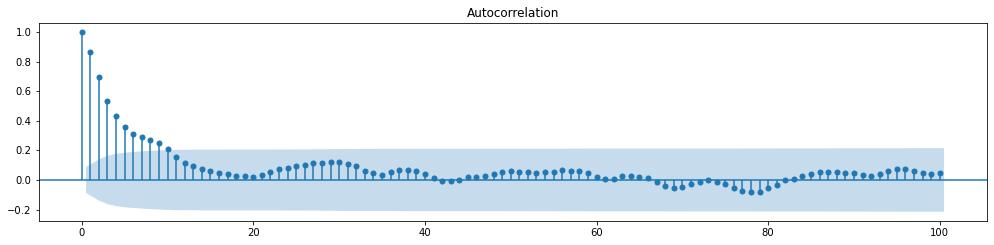

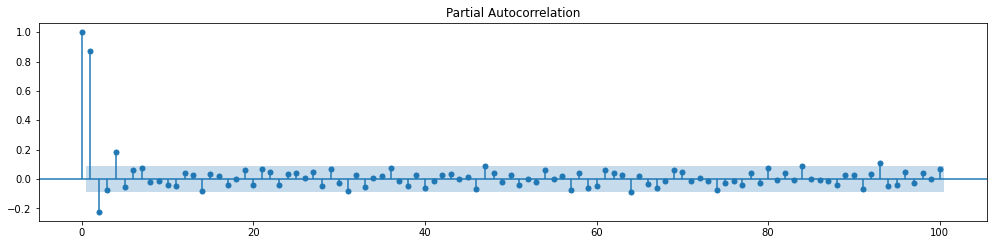

In [27]:
arma = arma22(500,0.5,0.2,0.6,0.3)
plt.figure(figsize(17,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(arma.squeeze(), lags=100, ax=ax)
plt.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(arma.squeeze(), lags=100, ax=ax)
plt.show()

Пример 7

Нарисуем коррелограммы для конфетного временного ряда

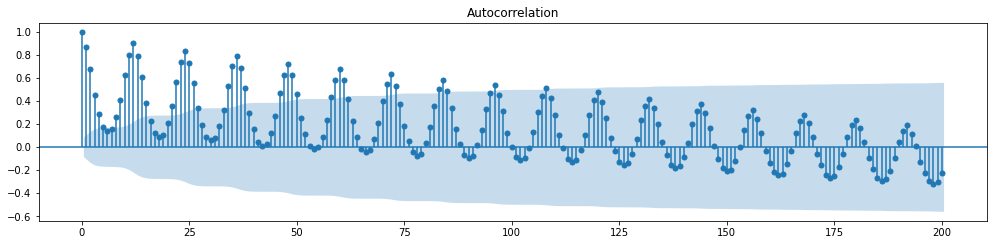

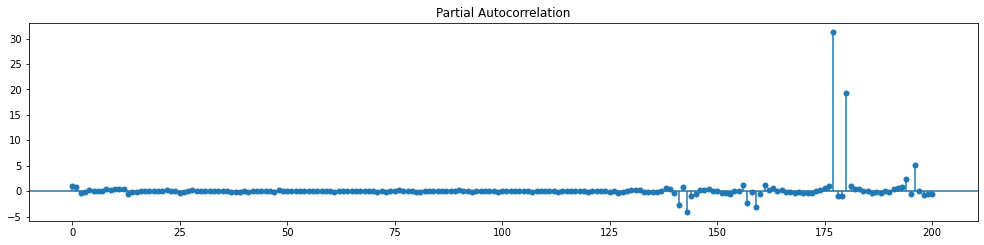

Критерий Дики-Фуллера: p=0.338178


In [40]:
df = pd.read_csv('candy_production.csv')
df['observation_date'] = pd.to_datetime(df['observation_date'], format = '%Y-%m-%d')
df = df.set_index(pd.DatetimeIndex(df['observation_date']))
df.drop(['observation_date'], axis =1, inplace = True)
candy=df.IPG3113N

plt.figure(figsize(17,8))

ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(candy.squeeze(), lags=200, ax=ax)
plt.show()

ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(candy.squeeze(), lags=200, ax=ax)
plt.show()

print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(candy)[1])

Обратите внимание на ACF - именно так выглядит комбинация тренда и сезонности. Тренд сдвигает значения корреляций вверх, а сезонность добавляет колебания с постоянным (это важно!) периодом